In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plot
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression


In [2]:
#Load dataset
df = pd.read_csv("C:/Users/keerthana s s/Machine_Learning_Internship/WineQT.csv")

In [3]:
df.shape

(1143, 13)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

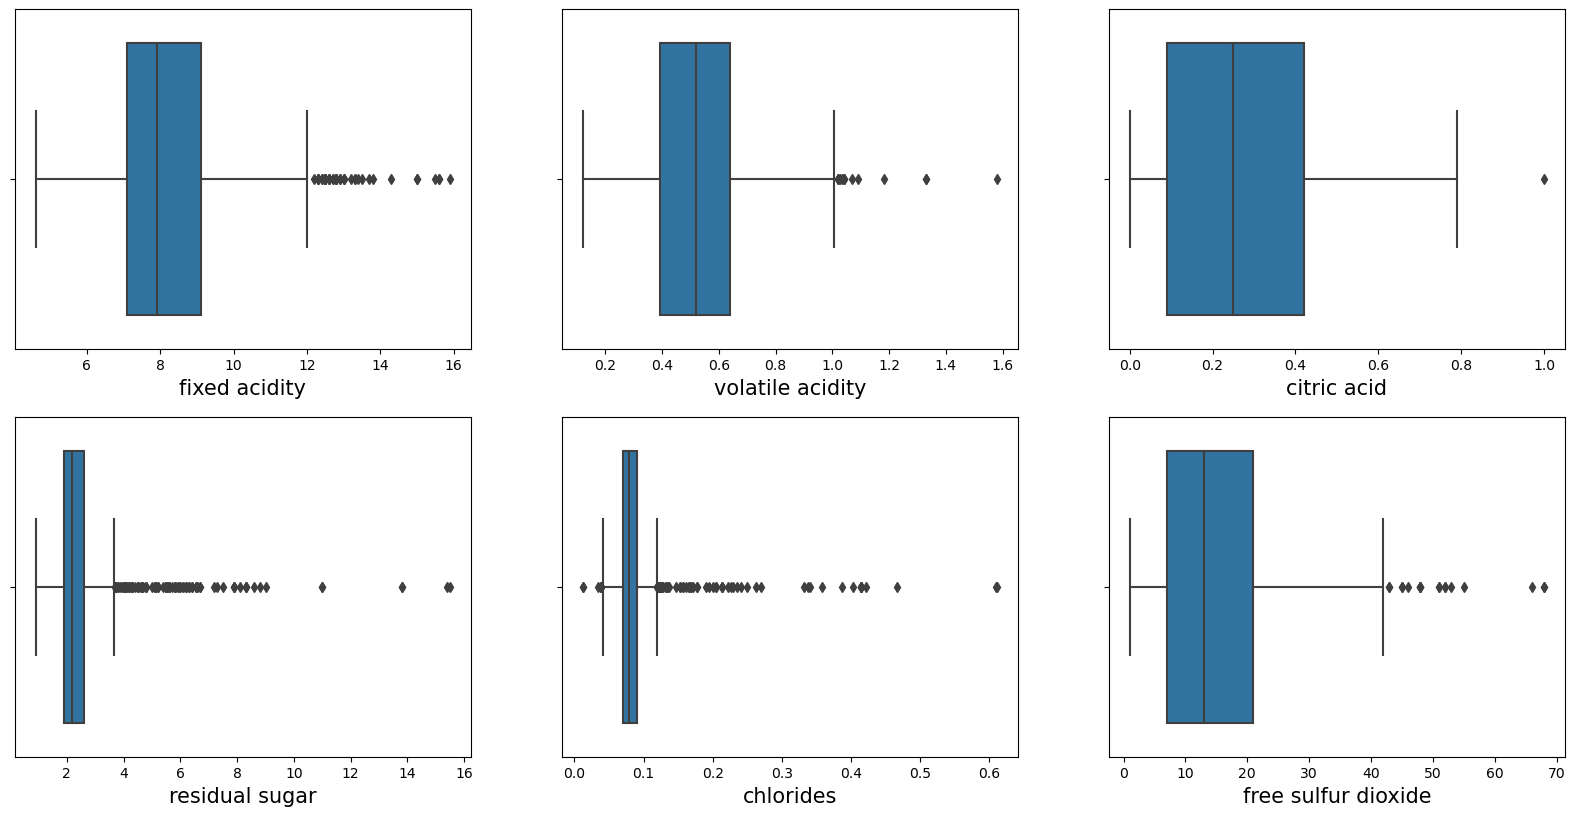

In [5]:
plot.figure(figsize=(20,15))
for i,col in enumerate(df.iloc[:,0:6]):
    plot.subplot(3,3,i+1)
    sns.boxplot(data=df.iloc[:,0:6],x=col)
    plot.xlabel(col, fontsize=15)
    plot.xticks(fontsize=10)

In [6]:
#caping the outliars
def cap_data(df):
    for col in df.columns:
        print("\n\n capping the \n",col)
        if (((df[col].dtype)=='float64') | ((df[col].dtype)=='int64')):
            
            q1=df[col].quantile(0.25)
            q3=df[col].quantile(0.75)
            iqr=q3-q1
            lower,upper=(q1-(iqr*1.5)),(q3+(iqr*1.5))    
            print("q1=",q1,"q3=",q3,"iqr=",iqr,"lower=",lower,"upper=",upper) 
            df[col][df[col] <= lower] = lower
            df[col][df[col] >= upper] = upper
            print("\n",df[col][df[col] <= lower] )
            print("\n",df[col][df[col] >= upper] )
            
        else:
            df[col]=df[col]
    return df

final_df=cap_data(df)



 capping the 
 fixed acidity
q1= 7.1 q3= 9.1 iqr= 2.0 lower= 4.1 upper= 12.1

 Series([], Name: fixed acidity, dtype: float64)

 145    12.1
146    12.1
170    12.1
171    12.1
188    12.1
211    12.1
234    12.1
240    12.1
244    12.1
248    12.1
254    12.1
258    12.1
259    12.1
260    12.1
272    12.1
279    12.1
284    12.1
301    12.1
304    12.1
306    12.1
310    12.1
311    12.1
313    12.1
332    12.1
334    12.1
361    12.1
367    12.1
382    12.1
388    12.1
392    12.1
397    12.1
399    12.1
400    12.1
401    12.1
404    12.1
405    12.1
415    12.1
416    12.1
425    12.1
433    12.1
462    12.1
584    12.1
586    12.1
864    12.1
Name: fixed acidity, dtype: float64


 capping the 
 volatile acidity
q1= 0.3925 q3= 0.64 iqr= 0.2475 lower= 0.021250000000000047 upper= 1.01125

 Series([], Name: volatile acidity, dtype: float64)

 66      1.01125
83      1.01125
87      1.01125
88      1.01125
92      1.01125
142     1.01125
396     1.01125
497     1.01125
502     1.011

C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= lower] = lower
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= upper] = upper
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][

q1= 3.205 q3= 3.4 iqr= 0.19499999999999984 lower= 2.9125000000000005 upper= 3.6925

 103     2.9125
310     2.9125
388     2.9125
461     2.9125
466     2.9125
714     2.9125
934     2.9125
1047    2.9125
Name: pH, dtype: float64

 32      3.6925
66      3.6925
396     3.6925
419     3.6925
493     3.6925
589     3.6925
785     3.6925
898     3.6925
923     3.6925
933     3.6925
935     3.6925
1063    3.6925
Name: pH, dtype: float64


 capping the 
 sulphates
q1= 0.55 q3= 0.73 iqr= 0.17999999999999994 lower= 0.28000000000000014 upper= 0.9999999999999999

 Series([], Name: sulphates, dtype: float64)

 11      1.0
13      1.0
31      1.0
54      1.0
59      1.0
61      1.0
64      1.0
75      1.0
103     1.0
112     1.0
129     1.0
161     1.0
167     1.0
182     1.0
200     1.0
240     1.0
262     1.0
264     1.0
265     1.0
266     1.0
289     1.0
337     1.0
341     1.0
357     1.0
359     1.0
366     1.0
454     1.0
488     1.0
490     1.0
514     1.0
538     1.0
572     1.0
738     

C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] <= lower] = lower
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][df[col] >= upper] = upper
C:\Users\keerthana s s\AppData\Local\Temp\ipykernel_8760\3543104039.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col][

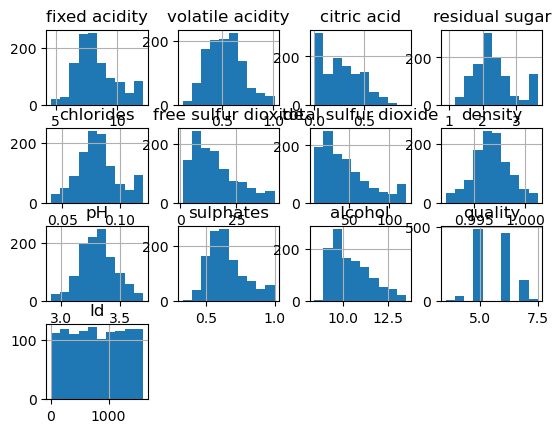

In [7]:
df.hist()
plot.show()

In [8]:
#Data preparation
x=df.drop(['quality'], axis=1)
y=df['quality']

In [9]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)



In [10]:
#Model Evaluation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

print("Root Mean Squared Error (RMSE):", rmse)
print("Mean Absolute Percentage Error (MAPE):", mape)






Root Mean Squared Error (RMSE): 0.5840934201881457
Mean Absolute Percentage Error (MAPE): 8.328631700738388
